In [1]:
import openpyxl
import pandas as pd
import matplotlib.pyplot as plt
import pprint
import requests
from requests_ntlm import HttpNtlmAuth

In [41]:
# Klasa do obsługi pliku excell

class excell_file:
    wb = None
    
    #Konstruktor otwiera plik i tworzy obiekt woorkbooka 
    def __init__(self, path):
        self.wb = openpyxl.load_workbook(path, keep_vba=True, data_only=True)
    
    #Zwraca listę nazw arkuszy w woorkbooku
    def get_sheets(self):
        return self.wb.sheetnames
    
    #Tworzenie tablicy  na podstawie zakresu 
    def get_table_from_range(self, sheet_name, col_start, col_stop, row_start, row_end):
        
        table_values = {}
        ws = self.wb[sheet_name]
        
        for i in range(row_start, row_end + 1):
            table_values[ws.cell(row=i,column=col_start).value] = ws.cell(row=i,column=col_stop).value
 
        return table_values

In [3]:
class sheet:
    
    table_list = []
    wb = None
    ws = None
    
    def __init__(self, wb, sheetname):
        
        self.table_list = wb[sheetname].tables.items()
        self.wb = wb
        self.ws = wb[sheetname]
        self.sheetname = sheetname
        
        
    def get_table(self):
        
        if len(self.table_list) > 1:
            print("Za dużo tabel na stronie")
        else:
            table = self.ws.tables[self.table_list[0][0]]
            data = self.ws[table.ref]
            rows_list = []
            for row in data:
                cols = []
                for col in row:
                    cols.append(col.value)
                rows_list.append(cols)
            df = pd.DataFrame(data=rows_list[1:], index=None, columns=rows_list[0])
            
            return df
        
        

In [4]:
class TracePie:

    
    def __init__(self, df_settings):
        self.df_hours = None
        self.df_settings = None
        self.TraceCat = []
        self.TaceVaules = []
        self.Tracedata = {}
        self.Explode = []
        self.df_settings = df_settings
    
    def generate_data(self, df_data):
        exp = []
        for item in self.df_settings.columns:
            sum = 0
            
            for package in self.df_settings[item]:
                if package != None:
                    
                    sum = sum + df_data.loc[(df_data['TaskNumber'].str.contains(package, na=False))]['QualifiedWorkTime'].sum()
            
            self.TraceCat.append(item)
            self.TaceVaules.append(sum)
            self.Explode.append(0.2)
        self.Tracedata['Kategorie'] = self.TraceCat
        self.Tracedata['Wartości'] = self.TaceVaules
        
    def generatePieTrace(self, sheetName):
        
        display(pd.DataFrame.from_dict(self.Tracedata))
        plt.pie(self.TaceVaules, labels = self.TraceCat, explode = self.Explode ,autopct='%1.1f%%', shadow=True)
        plt.title(sheetName)
        plt.show()
        
    
        

['HW_udział_prac', 'CSD_udział_prac_offline', 'CSD_udział_prac_online', 'CSD_realizacja']


,Kategorie,Wartości
0,Koordynacja,67.50
1,Uzgodnienia,3.00
2,Travel,15.00
3,Trening,10.00
4,Eplan,121.00
5,Opiski,12.25
6,Zamówienia mat. Objektowe,123.25
7,Zamawianie mat. Prefabrykacja,41.00
8,Dokumentacja,31.50
9,Open points,15.50


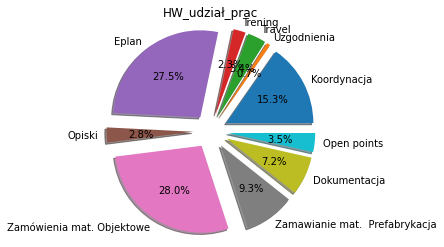

,Kategorie,Wartości
0,Koordynacja,29.5
1,Uzgodnienia,18.5
2,Trening,0.0
3,HW-config,8.0
4,Safety,8.0
5,Software logic,36.0
6,Wizualizacja,52.0
7,Systemy nadrzędne,24.0
8,Dokumentacja,31.5


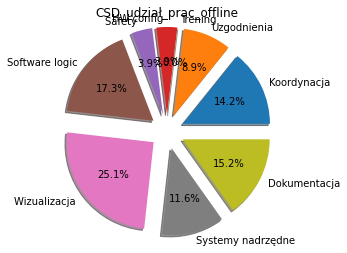

,Kategorie,Wartości
0,Travel,33.00
1,I/O check and dev. Configuration,57.50
2,Safety,0.00
3,Manual mode,9.50
4,Automatic mode,119.25
5,Wizualizacja,0.00
6,Systemy nadrzędne,3.75
7,Uruchomienie zawieszek,42.75
8,Asysta,59.50
9,open points,0.00


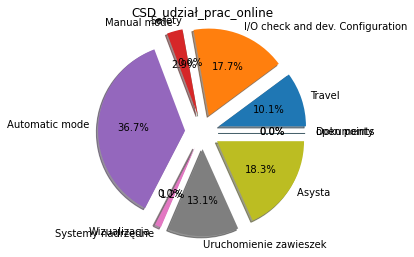

,Kategorie,Wartości
0,Biuro,240.50
1,Uruchomienie,292.25


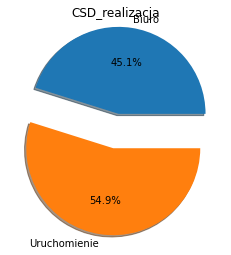

In [5]:
response = requests.get('http://wtms.bb.de/SzczepApi/Api/WTMS/1.0/Export/GetWorkTimesForProject/212237',auth=HttpNtlmAuth('bbpolska\mszczepan','Dzonby1987'))
df2 = pd.DataFrame.from_dict(response.json())


file = excell_file("./settings.xlsx")
wb =file.wb
print(file.get_sheets())

for sh in file.get_sheets():
    
    table1 = sheet(wb, sh)
    df1 = table1.get_table()
    trace1 = TracePie(df1)
    trace1.generate_data(df2)
    trace1.generatePieTrace(sh)

In [6]:
ck = {'inUserName': 'bbpolska\mszczepan', 'inUserPass': 'Dzonby1987'}

In [7]:
response = requests.get('http://wtms.bb.de/SzczepApi/Api/WTMS/1.0/Export/GetWorkTimesForProject/212237',auth=HttpNtlmAuth('bbpolska\mszczepan','Dzonby1987'))

In [8]:
df = pd.DataFrame.from_dict(response.json())

In [9]:
df[['Department','Stage','AreaNr','TaskNr']]= df['TaskNumber'].str.split('-', expand=True)

In [10]:
df

,StartDate,EndDate,ProjectNo,WorkIndexName,EmployeeFullName,QualifiedWorkTime,BreakLength,Description,TaskNumber,TaskName,Department,Stage,AreaNr,TaskNr
0,2022-04-06T11:30:00,2022-04-06T13:00:00,212237,Prace projektowe - biuro,Czachor Arkadiusz,1.5,0,- spotkanie: 212237-Bratysława materiały,1010-10-01-0001,"HW_LTVL_OFL_Layouts, cuts",1010,10,01,0001
1,2022-04-07T07:00:00,2022-04-07T09:00:00,212237,Prace projektowe - biuro,Czachor Arkadiusz,2.0,0,- spotkanie: 212237-Bratysława materiały,1010-10-01-0001,"HW_LTVL_OFL_Layouts, cuts",1010,10,01,0001
2,2022-04-07T12:00:00,2022-04-07T13:00:00,212237,Prace projektowe - biuro,Czachor Arkadiusz,1.0,0,- spotkanie: 212237-Bratysława materiały,1010-10-01-0001,"HW_LTVL_OFL_Layouts, cuts",1010,10,01,0001
3,2022-04-08T08:00:00,2022-04-08T09:00:00,212237,Prace projektowe - biuro,Czachor Arkadiusz,1.0,0,- spotkanie: 212237-layout cięć,1010-10-01-0001,"HW_LTVL_OFL_Layouts, cuts",1010,10,01,0001
4,2022-04-08T11:00:00,2022-04-08T15:00:00,212237,Prace projektowe - biuro,Czachor Arkadiusz,4.0,0,- spotkanie: 212237-layout cięć,1010-10-01-0001,"HW_LTVL_OFL_Layouts, cuts",1010,10,01,0001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,2022-09-15T11:00:00,2022-09-15T13:00:00,212237,Prace projektowe - biuro,Gräser Krzysztof,2.0,0,Przygotowanie listy i zamówieni brakujących la...,1010-10-01-0012,HW_LTVL_OFL_Open points list BEP,1010,10,01,0012
348,2022-09-19T08:00:00,2022-09-19T10:00:00,212237,Prace projektowe - praca zdalna,Witczak Dariusz,2.0,0,prace na projekcie,1070-00-00-0001,ELE-Coordination STEP #1,1070,00,00,0001
349,2022-09-20T08:00:00,2022-09-20T10:00:00,212237,Prace projektowe - biuro,Gräser Krzysztof,2.0,0,Organizacja brakujących materiałów i labelek. ...,1010-10-01-0012,HW_LTVL_OFL_Open points list BEP,1010,10,01,0012
350,2022-09-28T12:30:00,2022-09-28T13:00:00,212237,Prace projektowe - biuro,Czachor Arkadiusz,0.5,0,"- zwroty materiałów po prefabrykacji, finaliza...",1010-10-01-0007,HW_LTVL_OFL_Prefabrication of cabinets,1010,10,01,0007


In [11]:
df_HW = df.loc[df['Department'] == '1010'].groupby('EmployeeFullName', sort = False, as_index=False).agg({'QualifiedWorkTime':'sum'})
df_HW

,EmployeeFullName,QualifiedWorkTime
0,Czachor Arkadiusz,115.0
1,Gräser Krzysztof,190.0
2,Szymański Michał,128.0
3,Noworyta Radosław,6.0
4,Szczepan Mateusz,1.0


<AxesSubplot:xlabel='EmployeeFullName'>

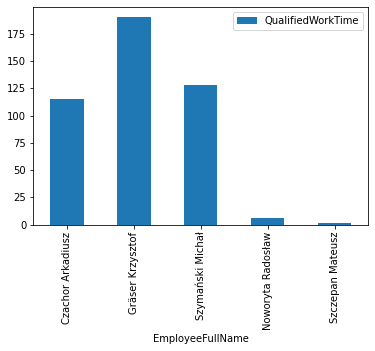

In [12]:
df_HW.plot(kind = 'bar', x = 'EmployeeFullName', y = 'QualifiedWorkTime')

In [13]:
df_SW = df.loc[df['Department'] == '1040'].groupby('EmployeeFullName', sort = False, as_index=False).agg({'QualifiedWorkTime':'sum'})
df_SW

,EmployeeFullName,QualifiedWorkTime
0,Noworyta Radosław,329.75
1,Sulik Jakub,203.00


<AxesSubplot:xlabel='EmployeeFullName'>

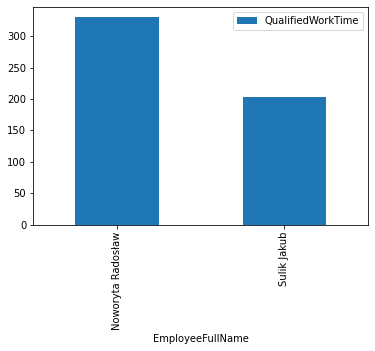

In [14]:
df_SW.plot(kind = 'bar', x = 'EmployeeFullName', y = 'QualifiedWorkTime')

In [15]:
df_PM = df.loc[df['Department'] == '1060'].groupby('EmployeeFullName', sort = False, as_index=False).agg({'QualifiedWorkTime':'sum'})
df_PM

,EmployeeFullName,QualifiedWorkTime
0,Szczepan Mateusz,10.0
1,Marzec Błażej,301.0


<AxesSubplot:xlabel='EmployeeFullName'>

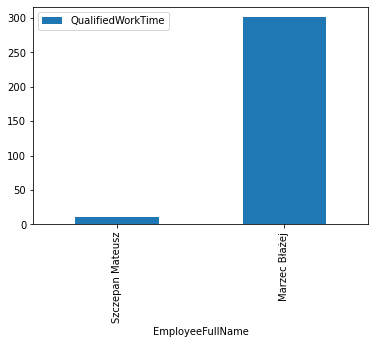

In [16]:
df_PM.plot(kind = 'bar', x = 'EmployeeFullName', y = 'QualifiedWorkTime')

In [17]:
df_dep = df.groupby('Department',as_index=False).agg({'QualifiedWorkTime':'sum'})
df_dep.insert(1, 'Department_name', ['HW', 'SW', 'PM','ELE_coor'], True)
index = ['HW', 'SW', 'PM','ELE_coor']
df_dep

,Department,Department_name,QualifiedWorkTime
0,1010,HW,440.00
1,1040,SW,532.75
2,1060,PM,311.00
3,1070,ELE_coor,44.00


<AxesSubplot:ylabel='QualifiedWorkTime'>

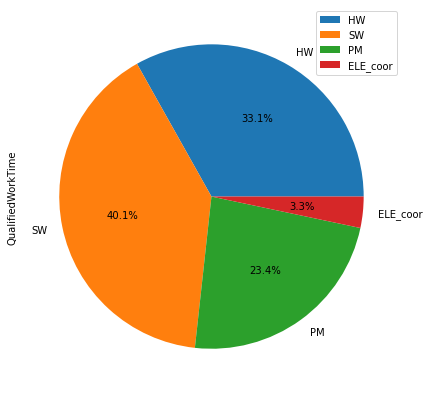

In [18]:
df_dep.plot(kind = 'pie' , labels = index, y = 'QualifiedWorkTime', autopct='%1.1f%%',figsize=(10,7))

In [19]:
df_HW_task = df.loc[df['Department']=='1010'].groupby(['TaskName','EmployeeFullName']).agg({'QualifiedWorkTime':'sum'}).unstack()


In [20]:
df_HW_task

QualifiedWorkTime  \
EmployeeFullName                              Czachor Arkadiusz   
TaskName                                                          
HW-Coordination STEP #1                                   33.50   
HW-Settlements STEP #1                                     3.00   
HW-Training STEP #1                                         NaN   
HW-Travel time STEP #1                                     9.00   
HW_LTVL_OFL_Device lists                                    NaN   
HW_LTVL_OFL_Eplan main                                      NaN   
HW_LTVL_OFL_Eplan overview                                  NaN   
HW_LTVL_OFL_Final documentation                            8.00   
HW_LTVL_OFL_Labels                                         1.25   
HW_LTVL_OFL_Layouts, cuts                                 23.50   
HW_LTVL_OFL_Open points list BEP                           1.00   
HW_LTVL_OFL_Open points list VW (MAT List)                 0.50   
HW_LTVL_OFL_Order materials for instalation               23.00   
HW_LTVL_OFL_Prefabrication of cabinets                     1.50   
HW_LTVL_OFL_Reorder materials for instalation             10.75   

                                                                \
EmployeeFullName                              Gräser Krzysztof   
TaskName                                                         
HW-Coordination STEP #1                                   29.0   
HW-Settlements STEP #1                                     NaN   
HW-Training STEP #1                                        NaN   
HW-Travel time STEP #1                                     NaN   
HW_LTVL_OFL_Device lists                                   6.0   
HW_LTVL_OFL_Eplan main                                    14.0   
HW_LTVL_OFL_Eplan overview                                 2.0   
HW_LTVL_OFL_Final documentation                           19.5   
HW_LTVL_OFL_Labels                                         8.0   
HW_LTVL_OFL_Layouts, cuts                                  1.0   
HW_LTVL_OFL_Open points list BEP                          12.0   
HW_LTVL_OFL_Open points list VW (MAT List)                 2.0   
HW_LTVL_OFL_Order materials for instalation               50.5   
HW_LTVL_OFL_Prefabrication of cabinets                    25.0   
HW_LTVL_OFL_Reorder materials for instalation             21.0   

                                                                 \
EmployeeFullName                              Noworyta Radosław   
TaskName                                                          
HW-Coordination STEP #1                                     NaN   
HW-Settlements STEP #1                                      NaN   
HW-Training STEP #1                                         NaN   
HW-Travel time STEP #1                                      6.0   
HW_LTVL_OFL_Device lists                                    NaN   
HW_LTVL_OFL_Eplan main                                      NaN   
HW_LTVL_OFL_Eplan overview                                  NaN   
HW_LTVL_OFL_Final documentation                             NaN   
HW_LTVL_OFL_Labels                                          NaN   
HW_LTVL_OFL_Layouts, cuts                                   NaN   
HW_LTVL_OFL_Open points list BEP                            NaN   
HW_LTVL_OFL_Open points list VW (MAT List)                  NaN   
HW_LTVL_OFL_Order materials for instalation                 NaN   
HW_LTVL_OFL_Prefabrication of cabinets                      NaN   
HW_LTVL_OFL_Reorder materials for instalation               NaN   

                                                                \
EmployeeFullName                              Szczepan Mateusz   
TaskName                                                         
HW-Coordination STEP #1                                    1.0   
HW-Settlements STEP #1                                     NaN   
HW-Training STEP #1                                        NaN   
HW-Travel time STEP #1                         

<AxesSubplot:xlabel='TaskName'>

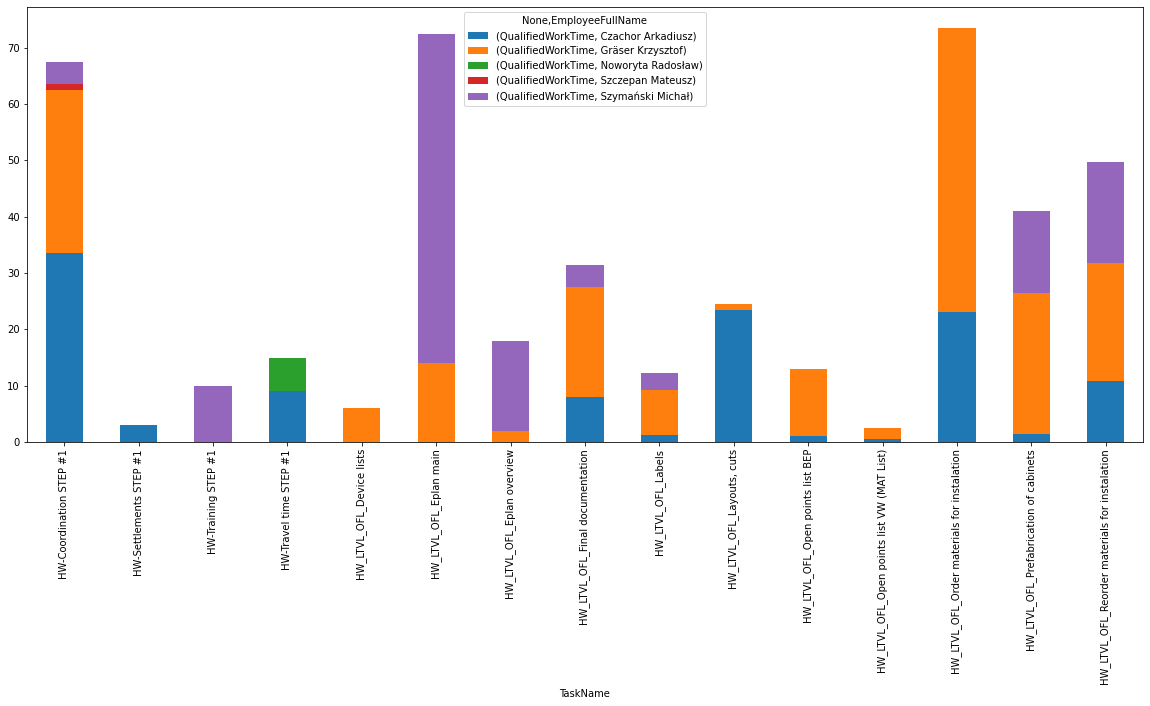

In [21]:
df_HW_task.plot.bar(stacked=True, figsize=(20,8))

In [22]:
df_SW_task_ofl = df.loc[(df['Department']=='1040') & (df['Stage']=='10') ].groupby(['TaskName','EmployeeFullName']).agg({'QualifiedWorkTime':'sum'}).unstack()
df_SW_task_ofl

QualifiedWorkTime            
EmployeeFullName               Noworyta Radosław Sulik Jakub
TaskName                                                    
CSD_LTVL_OFL_Cabinet                         4.0         NaN
CSD_LTVL_OFL_Documentation                  31.5         NaN
CSD_LTVL_OFL_Drive zone Empty                4.0         NaN
CSD_LTVL_OFL_Drive zone Full                24.0         NaN
CSD_LTVL_OFL_HW-config                       8.0         NaN
CSD_LTVL_OFL_Interfaces                      4.0         NaN
CSD_LTVL_OFL_Program Safety                  8.0         NaN
CSD_LTVL_OFL_Visualization                  12.0        40.0
CSD_LTVL_OFL_ZAUE                           24.0         NaN

<AxesSubplot:xlabel='TaskName'>

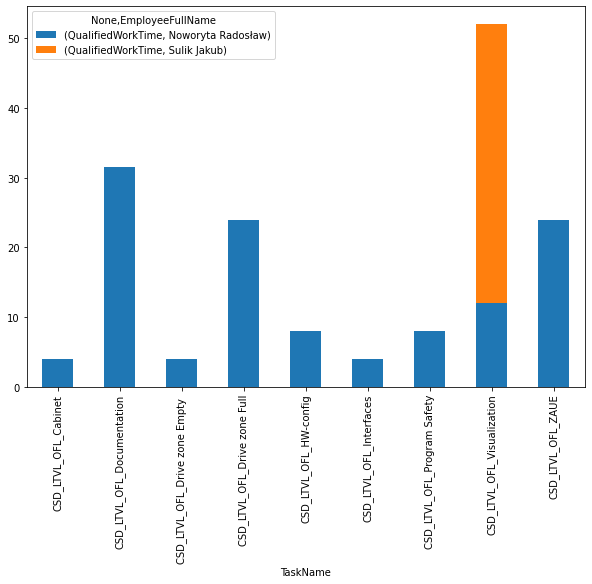

In [23]:
df_SW_task_ofl.plot.bar(stacked=True, figsize=(10,7))

In [24]:
df_SW_task_onl = df.loc[(df['Department']=='1040') & (df['Stage']=='30') ].groupby(['TaskName','EmployeeFullName']).agg({'QualifiedWorkTime':'sum'}).unstack()
df_SW_task_onl

QualifiedWorkTime            
EmployeeFullName                        Noworyta Radosław Sulik Jakub
TaskName                                                             
CSD_LTVL_IBN_Automatic test                         77.25       32.00
CSD_LTVL_IBN_Cabinet commissioning                  10.25       10.25
CSD_LTVL_IBN_Carriers software download               NaN       42.75
CSD_LTVL_IBN_I/O check                              11.00        7.00
CSD_LTVL_IBN_Interlock                              10.00         NaN
CSD_LTVL_IBN_Manual Mode                             9.50         NaN
CSD_LTVL_IBN_Network Configuration                   9.50        9.50
CSD_LTVL_IBN_Sichtbegleitung                        15.50       44.00
CSD_LTVL_IBN_ZAUE                                    0.75        3.00

<AxesSubplot:xlabel='TaskName'>

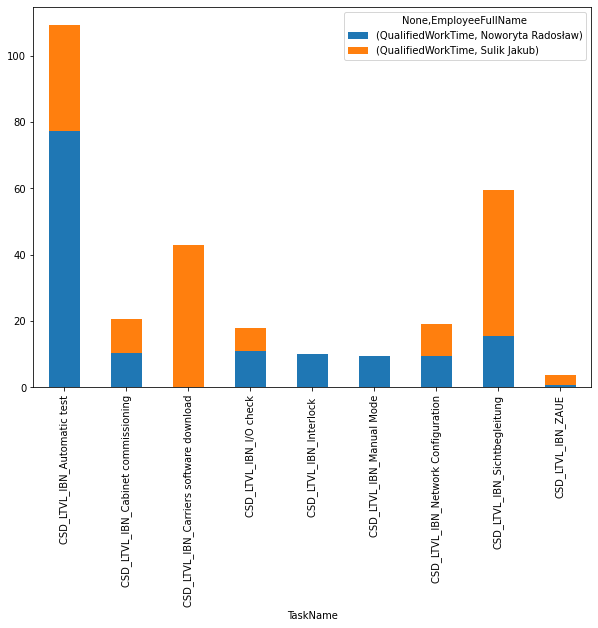

In [25]:
df_SW_task_onl.plot.bar(stacked=True, figsize=(10,7))

In [26]:
calculation =  excell_file("./Calculation.xlsx")

In [27]:
calculation =  excell_file("./Calculation1.xlsx")

C:\Users\mszczepan\Anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
C:\Users\mszczepan\Anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
C:\Users\mszczepan\Anaconda3\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [28]:
df_material = pd.DataFrame.from_dict([calculation.get_table_from_range('General Overview', 9, 10, 9, 15)])
df_material

,Electrical Equipment,Materials for Electrical Installation,Material for Cabinets,Panel and PC,Hybrid Cable,Trennblocke,Other
0,7974.4,7993.436525,8500,0,0,4320,0


In [39]:
df_material = pd.DataFrame.from_dict([calculation.get_table_from_range('General Overview', 9, 10, 9, 15)]).transpose()
df_material['Kategorie'] = df_material.index.values
df_material = df_material.rename(columns={0 : 'Wartości'})
df_material = df_material.reset_index(drop=True)

In [40]:
df_material

,Wartości,Kategorie
0,7974.400000,Electrical Equipment
1,7993.436525,Materials for Electrical Installation
2,8500.000000,Material for Cabinets
3,0.000000,Panel and PC
4,0.000000,Hybrid Cable
5,4320.000000,Trennblocke
6,0.000000,Other


In [38]:
df_nav =  pd.read_excel("./NAV.xlsx")
df_nav['Zużycie (Koszt razem)']

0           0.00
1           0.00
2       33130.78
3           0.00
4        5088.63
         ...    
271         0.00
272         0.00
273    391889.55
274         0.00
275    391889.55
Name: Zużycie (Koszt razem), Length: 276, dtype: float64

In [ ]:
trace1 = TracePie(df1)
trace1.generate_data(df2)